# Credit Scorecard Model - Home Credit Indonesia

## Import Library

In [108]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization style
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [109]:
df = pd.read_csv('application_train.csv')
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1. Exploratory Data Analysis

### 1.1. Descriptive Statistics

In [31]:
# Divide columns to the numerical and categorical columns
cats = df.select_dtypes(include = ['object'])
nums = df.select_dtypes(exclude = ['object'])

In [32]:
# Descriptive statistics for numerical column
nums_desc = nums.describe().T
nums_desc['unique'] = nums.nunique()
nums_desc['skewness'] = nums.skew()
nums_desc['upper_bound'] = nums_desc['75%'] + 1.5 * (nums_desc['75%'] - nums_desc['25%'])
nums_desc['lower_bound'] = nums_desc['25%'] - 1.5 * (nums_desc['75%'] - nums_desc['25%'])
nums_desc['has_outliers'] = np.where((nums_desc['min'] < nums_desc['lower_bound']) | (nums_desc['max'] > nums_desc['upper_bound']), 1, 0)
nums_desc = nums_desc[['count', 'mean', 'min', 'lower_bound', '25%', '50%', '75%', 'max', 'upper_bound', 'has_outliers', 'unique', 'skewness']].reset_index()
nums_desc = nums_desc.rename(columns = {'index': 'Features'})
nums_desc

,Features,count,mean,min,lower_bound,25%,50%,75%,max,upper_bound,has_outliers,unique,skewness
0,SK_ID_CURR,307511.0,278180.518577,1.000020e+05,-77850.000000,189145.500000,278202.000000,367142.500000,4.562550e+05,6.341380e+05,0,307511,-0.001200
1,TARGET,307511.0,0.080729,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1,2,3.078159
2,CNT_CHILDREN,307511.0,0.417052,0.000000e+00,-1.500000,0.000000,0.000000,1.000000,1.900000e+01,2.500000e+00,1,15,1.974604
3,AMT_INCOME_TOTAL,307511.0,168797.919297,2.565000e+04,-22500.000000,112500.000000,147150.000000,202500.000000,1.170000e+08,3.375000e+05,1,2548,391.559654
4,AMT_CREDIT,307511.0,599025.999706,4.500000e+04,-537975.000000,270000.000000,513531.000000,808650.000000,4.050000e+06,1.616625e+06,1,5603,1.234778
5,AMT_ANNUITY,307499.0,27108.573909,1.615500e+03,-10584.000000,16524.000000,24903.000000,34596.000000,2.580255e+05,6.170400e+04,1,13672,1.579777
6,AMT_GOODS_PRICE,307233.0,538396.207429,4.050000e+04,-423000.000000,238500.000000,450000.000000,679500.000000,4.050000e+06,1.341000e+06,1,1002,1.349000
7,REGION_POPULATION_RELATIVE,307511.0,0.020868,2.900000e-04,-0.017980,0.010006,0.018850,0.028663,7.250800e-02,5.664850e-02,1,81,1.488009
8,DAYS_BIRTH,307511.0,-16036.995067,-2.522900e+04,-30585.500000,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03,-1.509500e+03,0,17460,-0.115673
9,DAYS_EMPLOYED,307511.0,63815.045904,-1.791200e+04,-6466.500000,-2760.000000,-1213.000000,-289.000000,3.652430e+05,3.417500e+03,1,12574,1.664346


#### Observation:
- There are **no invalid values** among the columns used.
- **Irrelevant features** such as feature that has the number of unique values **equal to the number of rows** need to be removed.
- Based on the difference between mean and median value as well as skewness values that are **85 columns** that have **right-skewed** distributions (skewness >= 0.5) and **13 columns** that have **left-skewed** distributions (skewness <= -0.5).
- Based on the min and max values there are **98 columns** that have **outliers**.

In [33]:
# Remove the unnecessary columns
df.drop(columns = ['SK_ID_CURR'], inplace = True)

In [34]:
# Descriptive statistics for categorical column
cats_desc = cats.describe().T
cats_desc['unique_values'] = [cats[i].unique() for i in cats.columns]
cats_desc

,count,unique,top,freq,unique_values
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,"[Cash loans, Revolving loans]"
CODE_GENDER,307511,3,F,202448,"[M, F, XNA]"
FLAG_OWN_CAR,307511,2,N,202924,"[N, Y]"
FLAG_OWN_REALTY,307511,2,Y,213312,"[Y, N]"
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,307511,8,Working,158774,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391,"[Secondary / secondary special, Higher educati..."
NAME_FAMILY_STATUS,307511,6,Married,196432,"[Single / not married, Married, Civil marriage..."
NAME_HOUSING_TYPE,307511,6,House / apartment,272868,"[House / apartment, Rented apartment, With par..."
OCCUPATION_TYPE,211120,18,Laborers,55186,"[Laborers, Core staff, Accountants, Managers, ..."


#### Observation:
- The invalid values in **CODE_GENDER (XNA)** will be changed with **mode value (F)**.
- The ordinal data like **NAME_EDUCATION_TYPE** and the features that have only two unique values will be encoded with **Label Encoding**. Meanwhile, the nominal data will be encoded with **One-Hot Encoding (OHE)**.

### 1.2. Univariate Analysis

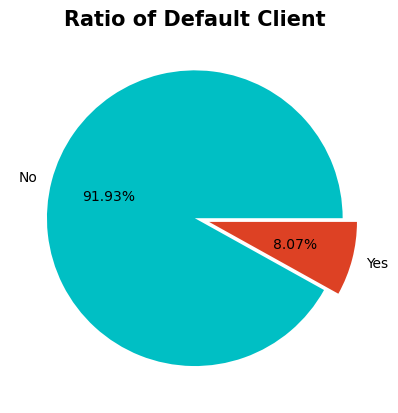

In [110]:
# Create pie chart
plt.pie(x = df['TARGET'].value_counts(), labels = ['No', 'Yes'], autopct = '%.2f%%',
        colors = ['#00bfc4', '#dd4124'], explode = [0, 0.1])

# Add the title
plt.title('Ratio of Default Client', fontweight = 'bold', fontsize = 15)

# Show the graph
plt.show()

#### 1.2.1. Categorical Data

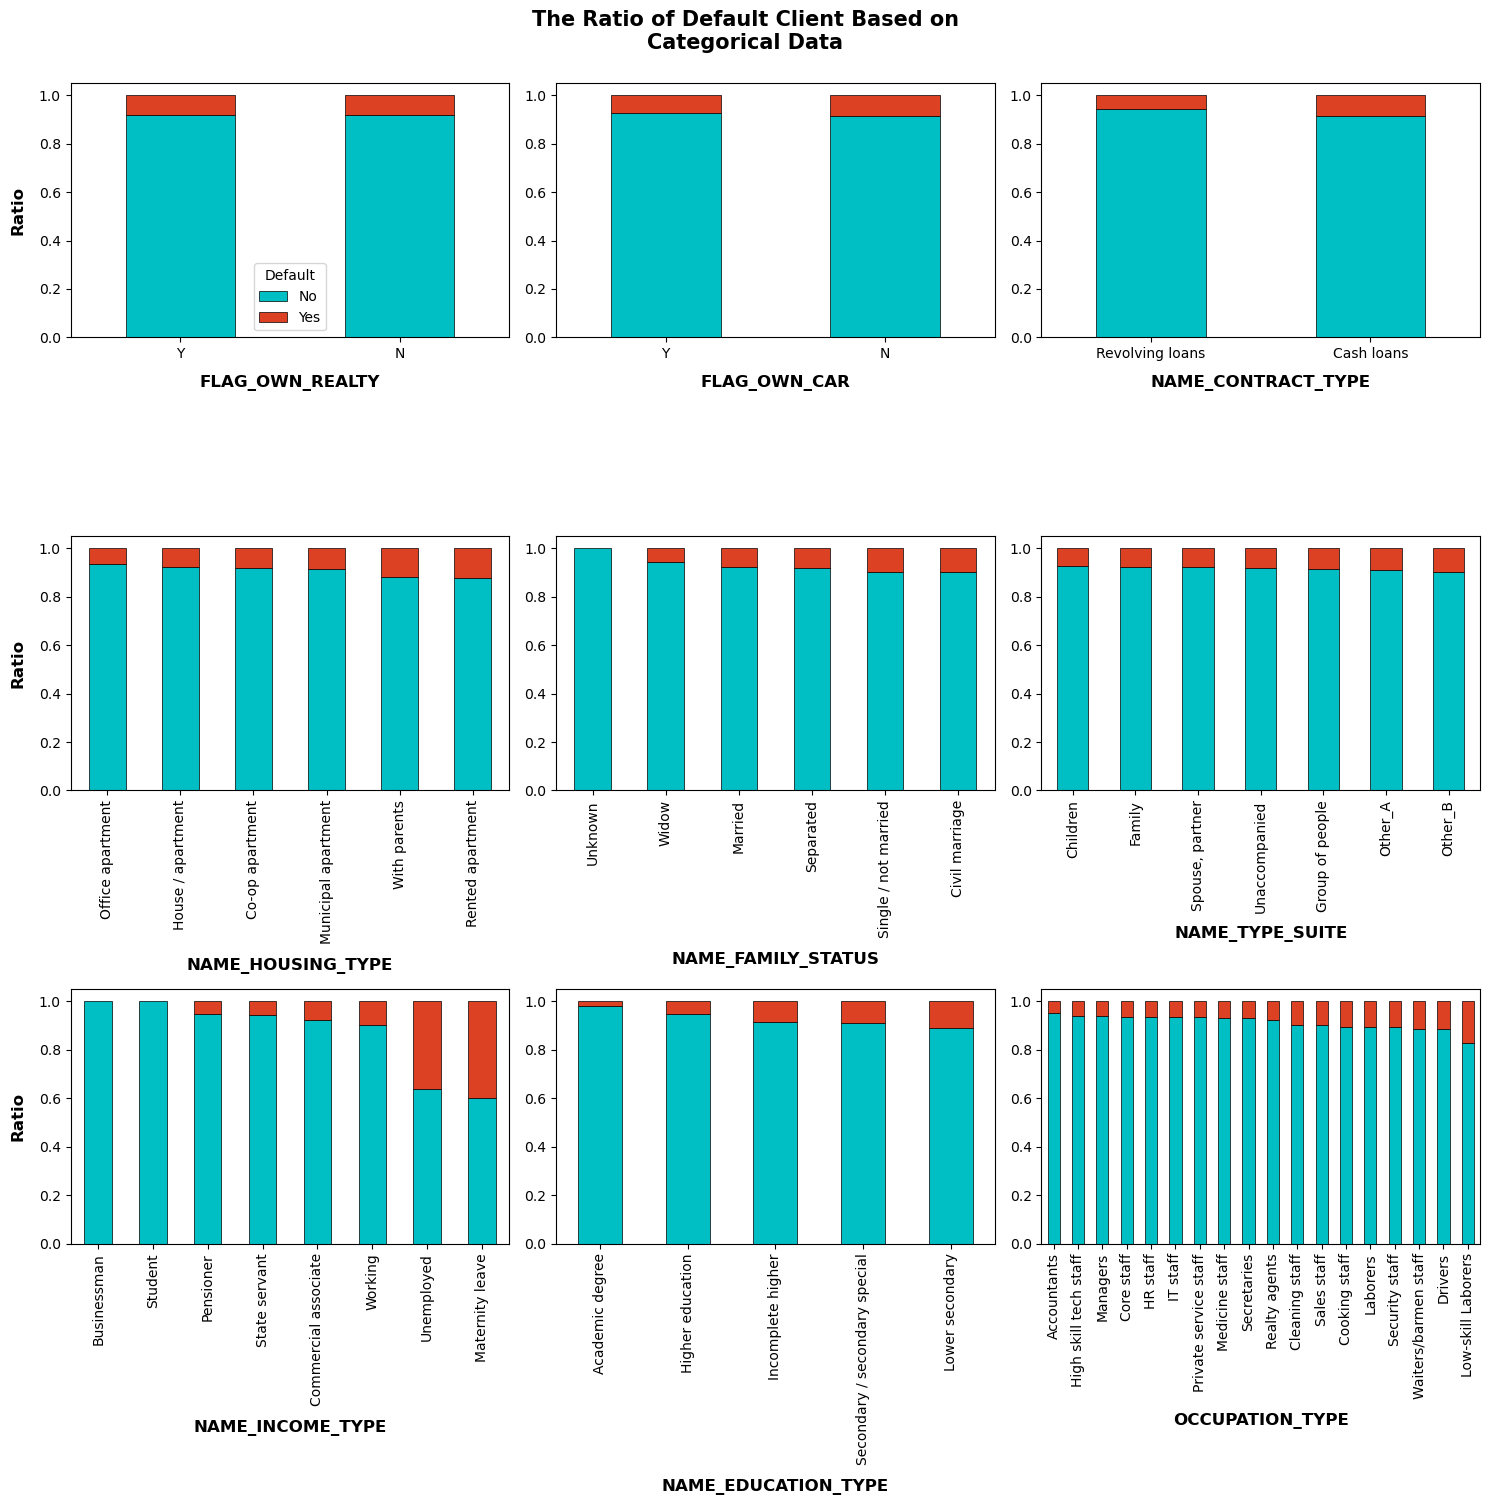

In [40]:
# Adjust image size
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Make the cat_columns list
cat_columns = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR',  'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 
               'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'] 

# Calculate the proportion of loan_approved for the cat_columns list
for i, cat_column in enumerate(cat_columns):
    df_cat = df.groupby([cat_column])['TARGET'].value_counts(normalize=True).unstack()
    df_cat = df_cat.rename(columns={0: 'No', 1: 'Yes'})
    df_cat = df_cat.sort_values('No', ascending=False)

    # Create a barchart
    ax1 = df_cat.plot.bar(stacked=True, color=['#00bfc4', '#dd4124'], edgecolor='black', linewidth=0.5, ax=ax[i // 3, i % 3])

    # Adjust xticks
    if i in [0, 1, 2]:
        ax1.set_xticklabels(df_cat.index, rotation = 0)

    # Adjust xlabel
    ax1.set_xlabel(cat_column, fontsize = 12, fontweight = 'bold', labelpad = 10)

    # Adjust ylabel
    if i in [0, 3, 6]:
        ax1.set_ylabel('Ratio', fontsize = 12, fontweight = 'bold', labelpad = 10)
    else:
        ax1.set_ylabel('')

    # Add legend
    if i in [0]:
      ax1.legend(title = 'Default', loc = 'lower center')
    else:
      ax1.get_legend().remove()

# Add title
plt.suptitle('The Ratio of Default Client Based on\nCategorical Data', fontweight='bold', fontsize=15, y=1)

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- The ratio of default clients who **own a house or car** is **not much different** from clients who **do not own a house or car**.
- Cash loans have a **slightly higher** default ratio compared to Revolving loans.
- Clients who own a house **less likely** to become default clients.
- The highest ratio of default clients comes from NAME_FAMILY_STATUS **Civil marriage** and the lowest comes from **Widow**.
- Clients who are accompanied by **family or partner** when applying for the loan are **less likely** to become default clients.
- The highest ratio of default clients comes from **Maternity leave** and **Unemployed** clients and the lowest comes from **Businessman**.
- The **higher** the education, the **less likely** to become the default clients.
- The highest ratio of default clients comes from clients working as **Low-skill Laborers** and the lowest comes from **Accountants**.

#### 1.2.2. Numerical Data

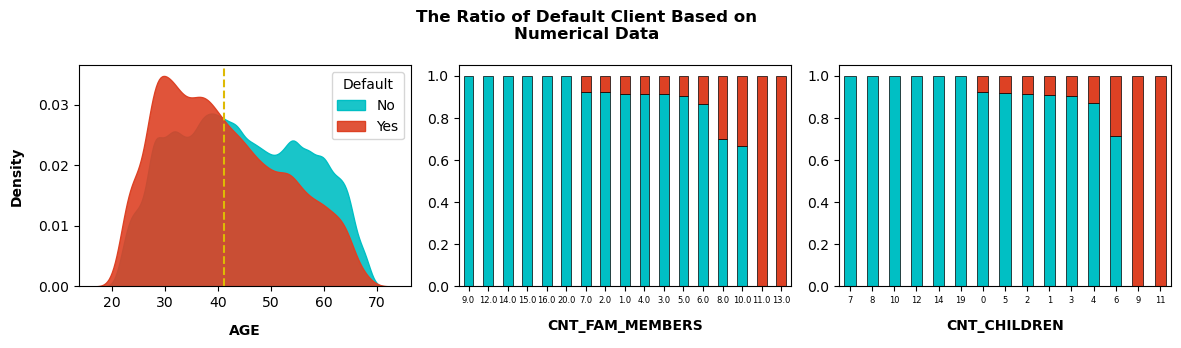

In [115]:
# Adjust image size
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))

# Create the num_columns list
num_columns = ['DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Data visualization
for i in range(len(num_columns)):
    plt.subplot(1, 3, i+1)
    
    # Divide data based on Target
    data_no = df[df['TARGET'] == 0]
    data_yes = df[df['TARGET'] == 1]
    
    if i in [0]:
      sns.kdeplot(x = data_no[num_columns[i]] / -365, color = '#00bfc4', fill = True, alpha = 0.9)
      sns.kdeplot(x = data_yes[num_columns[i]] / -365, color = '#dd4124', fill = True, alpha = 0.9)
      plt.axvline(x = 41, color='#deba04', linestyle='--')
      
      # Adjust xlabel
      plt.xlabel('AGE', fontweight = 'bold', labelpad = 10)
   
    else:
      df_num = df.groupby([num_columns[i]])['TARGET'].value_counts(normalize=True).unstack()
      df_num = df_num.rename(columns={0: 'No', 1: 'Yes'})
      df_num = df_num.sort_values('No', ascending=False)
      
      # Create a barchart
      ax1 = df_num.plot.bar(stacked = True, color=['#00bfc4', '#dd4124'], edgecolor='black', linewidth=0.5, ax=ax[i])

      # Adjust xlabel
      plt.xlabel(num_columns[i], fontweight = 'bold', labelpad = 10)
      
    if i in [1, 2]:
      # Adjust xticks
      ax1.set_xticklabels(df_num.index, fontsize = 6, rotation = 0)

    # Adjust ylabel
    if i in [0]:
        plt.ylabel('Density', fontweight = 'bold', labelpad = 10)
    else:
        plt.ylabel('')

    # Add a legend
    if i == 0:
        plt.legend(title = 'Default', labels=['No', 'Yes'], loc = 'upper right')
    else:
        plt.legend().set_visible(False)
        
# Add title
plt.suptitle('The Ratio of Default Client Based on\nNumerical Data', fontweight = 'bold')

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- The **older** the clients, the **less likely** to become default clients. 
- The **more family members and children**, the **more likely**, to become the default clients.

### 1.3. Bivariate Analysis

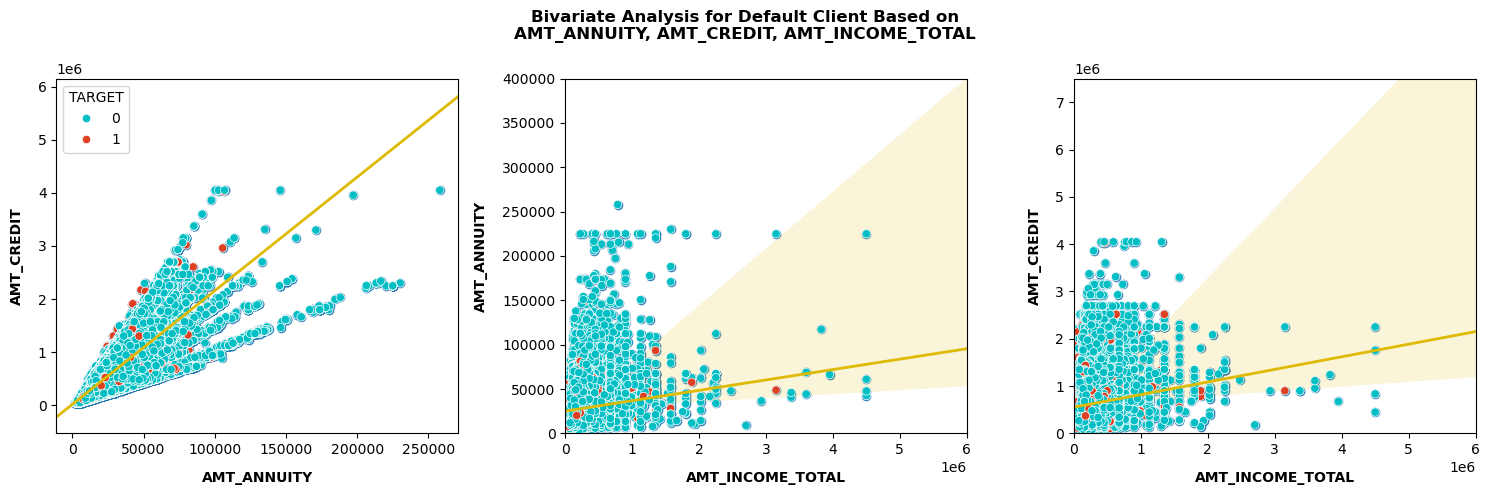

In [42]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Custom palette
palette = ['#00bfc4', '#dd4124']

# Create trend line
sns.regplot(data = df, x = 'AMT_ANNUITY', y = 'AMT_CREDIT', truncate = False, line_kws={"linewidth": 2, 'color': '#deba04'}, ax = axs[0])
sns.regplot(data = df, x = 'AMT_INCOME_TOTAL', y = 'AMT_ANNUITY', truncate = False, line_kws={"linewidth": 2, 'color': '#deba04'}, ax = axs[1])
sns.regplot(data = df, x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', truncate = False, line_kws={"linewidth": 2, 'color': '#deba04'}, ax = axs[2])

# Data visualization
sns.scatterplot(data = df, x = 'AMT_ANNUITY', y = 'AMT_CREDIT', hue = 'TARGET', palette = palette, ax = axs[0])
sns.scatterplot(data = df, x = 'AMT_INCOME_TOTAL', y = 'AMT_ANNUITY', hue = 'TARGET', palette = palette, ax = axs[1], legend = None)
axs[1].set_xlim(0, 6000000)
axs[1].set_ylim(0, 400000)
sns.scatterplot(data = df, x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', hue = 'TARGET', palette = palette, ax = axs[2], legend = None)
axs[2].set_xlim(0, 6000000)
axs[2].set_ylim(0, 7500000)

# Adjust x and y label
axs[0].set_xlabel ('AMT_ANNUITY', fontweight = 'bold', labelpad = 10)
axs[0].set_ylabel ('AMT_CREDIT', fontweight = 'bold', labelpad = 10)
axs[1].set_xlabel ('AMT_INCOME_TOTAL', fontweight = 'bold', labelpad = 10)
axs[1].set_ylabel ('AMT_ANNUITY', fontweight = 'bold', labelpad = 10)
axs[2].set_xlabel ('AMT_INCOME_TOTAL', fontweight = 'bold', labelpad = 10)
axs[2].set_ylabel ('AMT_CREDIT', fontweight = 'bold', labelpad = 10)
    
# Add title
plt.suptitle('Bivariate Analysis for Default Client Based on\nAMT_ANNUITY, AMT_CREDIT, AMT_INCOME_TOTAL', fontweight = 'bold')

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- AMT_ANNUITY have **strong positive** correlation with AMT_CREDIT.
- AMT_INCOME_TOTAL also have **positive** correlation with AMT_ANNUITY and AMT_CREDIT although **not very strong**.

### 1.4. Multivariate Analysis

#### 1.4.1. Predictive Power Score

In [43]:
# Install ppscore package
!pip install -U ppscore

In [44]:
# Import library
import ppscore as pps

# Make pivot table ppscore
df_pps = pps.matrix(df)

In [47]:
# Create pivot table for pps
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')
matrix_df = matrix_df[matrix_df['TARGET'] != 0]
matrix_df = matrix_df[matrix_df.index]
matrix_df

x,DAYS_BIRTH,EMERGENCYSTATE_MODE,EXT_SOURCE_1,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,TARGET
y,,,,,,,,,,,,
DAYS_BIRTH,1.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,9.418128e-04,1.666687e-02,6.212066e-02,3.747564e-02,0.000000e+00,1.631921e-03
EMERGENCYSTATE_MODE,0.0,1.000000e+00,0.000000,0.000000,0.000000e+00,1.754632e-06,1.332885e-06,1.332885e-06,1.332885e-06,1.332885e-06,1.483428e-06,1.332885e-06
EXT_SOURCE_1,0.0,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.183651e-03,1.843755e-02,2.286995e-02,0.000000e+00,1.036479e-02
EXT_SOURCE_3,0.0,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.683640e-02
FONDKAPREMONT_MODE,0.0,1.279069e-07,0.000000,0.000000,1.000000e+00,1.644889e-02,1.279069e-07,1.279069e-07,1.279069e-07,1.279069e-07,1.287744e-07,1.279069e-07
HOUSETYPE_MODE,0.0,1.086466e-06,0.000000,0.000000,0.000000e+00,1.000000e+00,1.086466e-06,1.086466e-06,1.086466e-06,1.086466e-06,0.000000e+00,1.086466e-06
NAME_CONTRACT_TYPE,0.0,2.310621e-07,0.000000,0.000000,2.187978e-07,3.094868e-07,1.000000e+00,0.000000e+00,2.442706e-07,2.442706e-07,3.037145e-07,2.442706e-07
NAME_EDUCATION_TYPE,0.0,0.000000e+00,0.032474,0.027432,1.099570e-07,1.470667e-07,1.566723e-07,1.000000e+00,1.566723e-07,1.090679e-03,0.000000e+00,1.566723e-07
NAME_FAMILY_STATUS,0.0,1.425872e-07,0.000000,0.007871,0.000000e+00,1.065148e-07,1.441024e-07,1.441024e-07,1.000000e+00,1.441024e-07,5.594640e-03,1.441024e-07


#### 1.4.2. Heatmap

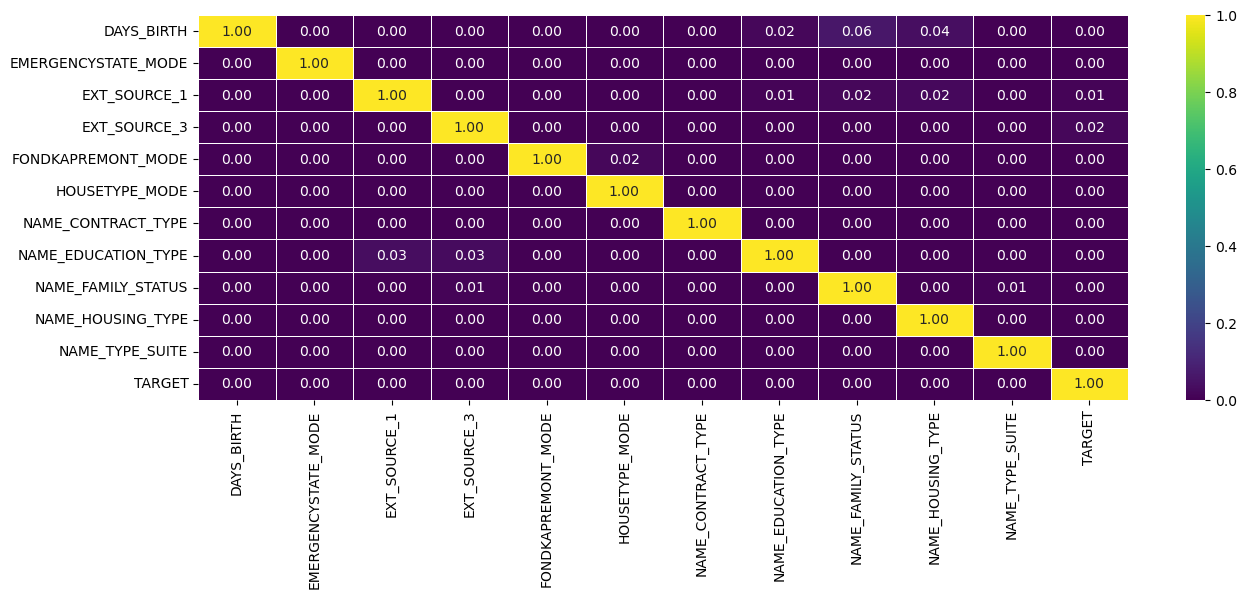

In [49]:
# Adjust image size
plt.figure(figsize = (15, 5))

# Create heatmap
sns.heatmap(matrix_df, cmap = 'viridis', annot = True, fmt='.2f', linewidths = 0.5)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### Observation:
Based on **predictive power score** we will only use **11 features** for data preprocessing.

## 2. Data Preprocessing

In [60]:
# Create new DataFrame
df = df[matrix_df.index]

### 2.1. Handle Missing Values

In [61]:
# Check the missing values percentage
mvp = pd.DataFrame(df.isnull().sum(), columns = ['Null Values'])
mvp['Percentage'] = (mvp['Null Values'] / df.shape[0]) * 100
mvp = mvp.sort_values(by = ['Percentage'], ascending = False).reset_index().rename(columns={'index': 'Features'})
mvp

,Features,Null Values,Percentage
0,FONDKAPREMONT_MODE,210295,68.386172
1,EXT_SOURCE_1,173378,56.381073
2,HOUSETYPE_MODE,154297,50.176091
3,EMERGENCYSTATE_MODE,145755,47.398304
4,EXT_SOURCE_3,60965,19.825307
5,NAME_TYPE_SUITE,1292,0.420148
6,DAYS_BIRTH,0,0.000000
7,NAME_CONTRACT_TYPE,0,0.000000
8,NAME_EDUCATION_TYPE,0,0.000000
9,NAME_FAMILY_STATUS,0,0.000000


#### Observation:
Based on the percentage of missing values above, we will remove features that have **more than 30%** missing values.

In [62]:
# Remove unnecessary features
features = mvp['Features'].iloc[:4]
df = df.drop(columns = features)
df.head(3)

,DAYS_BIRTH,EXT_SOURCE_3,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,TARGET
0,-9461,0.139376,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Unaccompanied,1
1,-16765,NaN,Cash loans,Higher education,Married,House / apartment,Family,0
2,-19046,0.729567,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Unaccompanied,0


In [63]:
# Show columns with missing values
df_null = pd.DataFrame(df.isnull().sum()).reset_index(names = 'Features')
df_null = df_null.rename(columns={0: 'Null Values'})
df_null = df_null[df_null['Null Values'] > 0].reset_index(drop = True)
df_null['dtype'] = [np.dtype(df[i]) for i in df_null.Features]
df_null = pd.merge(df_null, nums_desc, how = 'left', on = 'Features')
df_null[['Features', 'Null Values', 'skewness', 'dtype']]

,Features,Null Values,skewness,dtype
0,EXT_SOURCE_3,60965,-0.40939,float64
1,NAME_TYPE_SUITE,1292,NaN,object


#### Observation:
The **EXT_SOURCE_3** will be imputed with **mean** value because it has almost symmetrical distribution and the **NAME_TYPE_SUITE** with **mode** value.

In [64]:
# Imputation with mean
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace = True)

In [65]:
# Imputation with mode
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [66]:
# Show missing values
df.isnull().sum()

DAYS_BIRTH             0
EXT_SOURCE_3           0
NAME_CONTRACT_TYPE     0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
NAME_TYPE_SUITE        0
TARGET                 0
dtype: int64

### 2.2. Duplicated Data

In [67]:
# Show the duplicate data
df.duplicated().sum()

8383

In [68]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

### 2.3. Feature Encoding

In [69]:
# Show the sample data
df.sample(3)

,DAYS_BIRTH,EXT_SOURCE_3,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,TARGET
202312,-17539,0.517297,Cash loans,Higher education,Civil marriage,House / apartment,Unaccompanied,0
33991,-18742,0.372334,Cash loans,Higher education,Single / not married,House / apartment,Family,0
58786,-9049,0.486653,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Family,0


In [70]:
# Perform label encoding
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 1, 'Secondary / secondary special': 2, 
                                                           'Incomplete higher': 3, 'Higher education': 4, 'Academic degree': 5})

In [71]:
# Perform one-hot encoding
for cat in ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE']:
  df_dummies = pd.get_dummies(df[cat], prefix = cat)
  df  = df.drop(cat, axis = 1)
  df  = df.join(df_dummies)

In [72]:
# Show the data
df.head(3)

,DAYS_BIRTH,EXT_SOURCE_3,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,TARGET,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,-9461,0.139376,0,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,-16765,0.510853,0,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,-19046,0.729567,1,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### 2.4. Split Data

In [73]:
# Divide dataset to feature and target
X = df.drop(columns = 'TARGET')
y = df['TARGET']

# Perform data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 2.5. Handle Outliers

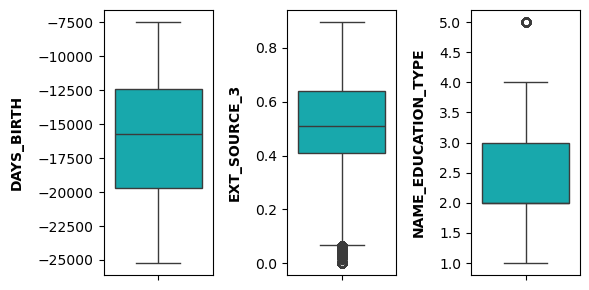

In [84]:
# Create the train_columns variable
train_columns = ['DAYS_BIRTH', 'EXT_SOURCE_3', 'NAME_EDUCATION_TYPE']

# Adjust the image size
plt.figure(figsize = (6, 3))

# Menampilkan boxplot kolom numerik
for i in range(len(train_columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = X_train[train_columns[i]], color = '#00bfc4', orient = 'v')
    plt.ylabel(train_columns[i], fontweight = 'bold', fontsize = 10, labelpad = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

# Show the graph
plt.show()

In [85]:
# Remove the outliers using IQR method
print("Number of rows:")
print('-' * 15)
print(f"BEFORE outliers removed: {len(X_train)}")

# Merge the data train
train = X_train.join(y_train)

for i in ['EXT_SOURCE_3']:
  
  # Calculate IQR
  q1 = np.percentile(train[i], 25)
  q3 = np.percentile(train[i], 75)
  iqr = q3 - q1

  # Calculate the lower and upper bounds
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Filter the data
  train = train[(train[i] >= lower_bound) & (train[i] <= upper_bound)]

# Split the data train
X_train = train.drop(columns = 'TARGET')
y_train = train['TARGET']
    
print(f"AFTER outliers removed: {len(X_train)}")

Number of rows:
---------------
BEFORE outliers removed: 209389
AFTER outliers removed: 207592


### 2.6. Handle Class Imbalance

In [86]:
# Divide dataset to feature and target
x = X_train
y = y_train

print("Comparison between TARGET classes before class imbalance is handled:")
print(pd.Series(y).value_counts())

Comparison between TARGET classes before class imbalance is handled:
0    190741
1     16851
Name: TARGET, dtype: int64


In [87]:
# Perform handling class imbalance
from imblearn import over_sampling
X_train, y_train = over_sampling.SMOTE(sampling_strategy = 1).fit_resample(x, y)

print("Comparison between TARGET classes after class imbalance is handled:")
print(pd.Series(y_train).value_counts())

Comparison between TARGET classes after class imbalance is handled:
0    190741
1    190741
Name: TARGET, dtype: int64


In [88]:
# Show the X_train
X_train.sample(3)

,DAYS_BIRTH,EXT_SOURCE_3,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
161622,-22874,0.510853,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
29011,-19734,0.510853,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
379346,-13477,0.338029,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### 2.7. Standardization

In [89]:
# Import library
from sklearn.preprocessing import StandardScaler

# Initiate a Standard scaler
scaler = StandardScaler()

# Create list of column to standardize
column_list = ['DAYS_BIRTH', 'NAME_EDUCATION_TYPE']

# Perform scaling process
for col in column_list:
    scaler.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [90]:
# Show the X_train
X_train.sample(3)

,DAYS_BIRTH,EXT_SOURCE_3,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
263280,0.762951,0.418811,0,-0.467818,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21299,-0.314688,0.622922,0,-0.467818,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
302119,1.397659,0.308500,0,-0.467818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
# Show the X_test
X_test.sample(3)

,DAYS_BIRTH,EXT_SOURCE_3,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
303131,0.418911,0.634706,0,-0.467818,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
225935,0.741463,0.542445,0,2.170993,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
73962,1.653668,0.067794,0,0.851588,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


## 3. Modeling

### 3.1. Initiate Model

In [92]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

# Instantiation machine learning algorithm
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)
et = ExtraTreesClassifier (random_state = 42)

# Create the models list
models = [lr, dt, rf, ada, gb, et]

### 3.2. Model Training & Validation

In [93]:
# Create list for the result
result = []

# Model training and validation
for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train.values)
    y_pred = model.predict(X_test.values)
    
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 5)
    accuracy_test = round(accuracy_score(y_test, y_pred), 5)
    end = time.time()
    
    result.append([accuracy_train, accuracy_test, (accuracy_test - accuracy_train), (end - start)])

In [94]:
# Create DataFrame for the result
df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'ExtraTrees']})
df_result = pd.DataFrame(data = result, columns = ['Acc (Train)', 'Acc (Test)', 'Δ Acc', 'Time Elapsed'])
df_metrics = df_models.join(df_result)

# Show the Dataframe
df_metrics.sort_values('Acc (Test)', ascending = False, ignore_index = True, inplace = True)
df_metrics

,Model,Acc (Train),Acc (Test),Δ Acc,Time Elapsed
0,Logistic Regression,0.84935,0.87699,0.02764,2.153283
1,Random Forest,0.99776,0.85236,-0.14540,82.075135
2,ExtraTrees,0.99781,0.84879,-0.14902,53.402744
3,GradientBoost,0.85507,0.83701,-0.01806,42.769334
4,Decision Tree,0.99781,0.82371,-0.17410,2.938740
5,AdaBoost,0.84746,0.80384,-0.04362,15.819693


### 3.3. Hyperparameter Tuning

In [95]:
# import library
from sklearn.model_selection import RandomizedSearchCV

# Determine hyperparameters to be optimized
grid_parameters = [
    
        { # Logistic regression
        'penalty' : ['l2','l1','elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver' : ['liblinear', 'saga', 'newton-cg','lbfgs'],
        'multi_class' : ['multinomial']
    },  
        { # Decision Tree 
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },     
        { # Random Forest
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini','entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
        { # AdaBoost
        'learning_rate': [0.01, 0.1, 1],
        'n_estimators': [50, 100, 200],
        'algorithm' : ['SAMME.R', 'SAMME'] 
    },  
        { # GradientBoost
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4], 
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_features': ['sqrt', 'log2'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'loss': ['log_loss', 'exponential']
    },
        { # Extra Trees
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini','entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True],
        'n_jobs': [-1]
    }
]

In [96]:
# List of random search result
result_rs = []

# Perform random search
for i, model in enumerate(models):
  hyperparameters = grid_parameters[i]
  random_search = RandomizedSearchCV(estimator = model, param_distributions = hyperparameters, scoring = 'accuracy', cv = 5)
  
  start_rs = time.time()
  random_search.fit(X_train.values, y_train)
  y_pred_train_rs = random_search.predict(X_train.values)
  y_pred_rs = random_search.predict(X_test.values)

  accuracy_train_rs = round(accuracy_score(y_train, y_pred_train_rs), 5)
  accuracy_test_rs = round(accuracy_score(y_test, y_pred_rs), 5)
  end_rs = time.time()

  result_rs.append([accuracy_train_rs, accuracy_test_rs, (accuracy_test_rs - accuracy_train_rs), (end_rs - start_rs)])

In [97]:
# Create DataFrame for the random search result
df_result_rs = pd.DataFrame(data = result_rs, columns = ['Acc (Train)', 'Acc (Test)', 'Δ Acc', 'Time Elapsed'])
df_metrics_rs = df_models.join(df_result_rs)

# Show the Dataframe
df_metrics_rs.sort_values('Acc (Test)', ascending = False, ignore_index = True, inplace = True)
df_metrics_rs

,Model,Acc (Train),Acc (Test),Δ Acc,Time Elapsed
0,Logistic Regression,0.84939,0.87734,0.02795,169.779793
1,ExtraTrees,0.95340,0.87382,-0.07958,417.120225
2,Random Forest,0.96629,0.86977,-0.09652,865.018647
3,GradientBoost,0.86552,0.85087,-0.01465,1245.015871
4,Decision Tree,0.91870,0.82055,-0.09815,15.366524
5,AdaBoost,0.84746,0.80384,-0.04362,1248.123892


#### Observation:
Based on the **hyperparameter tuning** results, we will choose **Logistic Regression** as the model because it has **the highest accuracy** on the test data.

### 3.4. Feature Importances

In [98]:
# Randomized Search
random_search = RandomizedSearchCV(estimator = lr, param_distributions = grid_parameters[0], scoring = 'accuracy', cv = 5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'multi_class': ['multinomial'],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'solver': ['liblinear', 'saga',
                                                   'newton-cg', 'lbfgs']},
                   scoring='accuracy')

In [106]:
# Create new Dataframe for feature importances
lr_tuned = random_search.best_estimator_
df_fi = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lr_tuned.coef_[0]})
df_fi.sort_values('Coefficient', ascending=False, ignore_index=True, inplace=True)
df_fi

,Features,Coefficient
0,DAYS_BIRTH,0.161840
1,NAME_FAMILY_STATUS_Unknown,-0.095707
2,NAME_EDUCATION_TYPE,-0.234591
3,NAME_CONTRACT_TYPE,-0.800814
4,EXT_SOURCE_3,-1.600062
5,NAME_TYPE_SUITE_Unaccompanied,-3.754086
6,NAME_HOUSING_TYPE_House / apartment,-3.921759
7,NAME_TYPE_SUITE_Other_B,-4.213070
8,NAME_TYPE_SUITE_Family,-4.278446
9,NAME_HOUSING_TYPE_With parents,-4.328007


In [99]:
# Install colour
!pip install colour

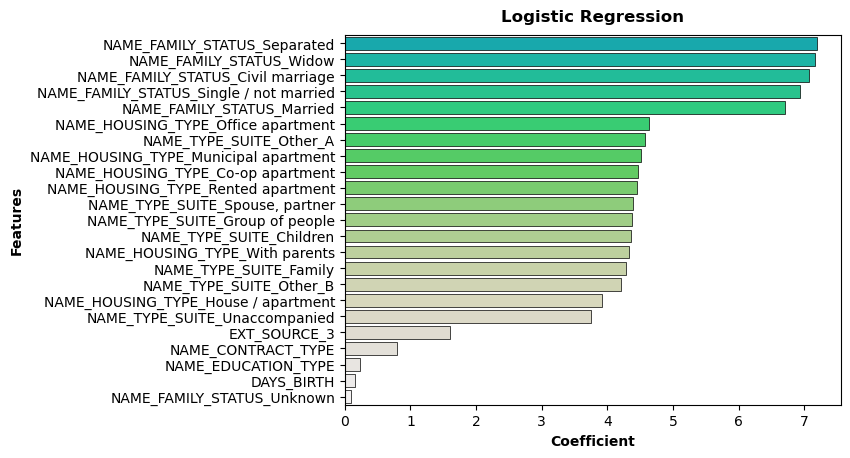

In [102]:
# Import library
from colour import Color

# Create a gradient of colors from green to white
green = Color('#00bfc4')
colors = [str(color) for color in green.range_to(Color('white'), 25)]

# Create a barchart
sns.barplot(data=df_fi, x='Coefficient', y='Features', palette=colors, linewidth=0.5, edgecolor='black', orient='h')

# Adjust x and y label
plt.xlabel('Coefficient', fontweight='bold')
plt.ylabel('Features', fontweight='bold')

# Add title
plt.title('Logistic Regression', fontweight = 'bold', pad=10)

# Show the graph
plt.show()

### 3.5. Confusion Matrix

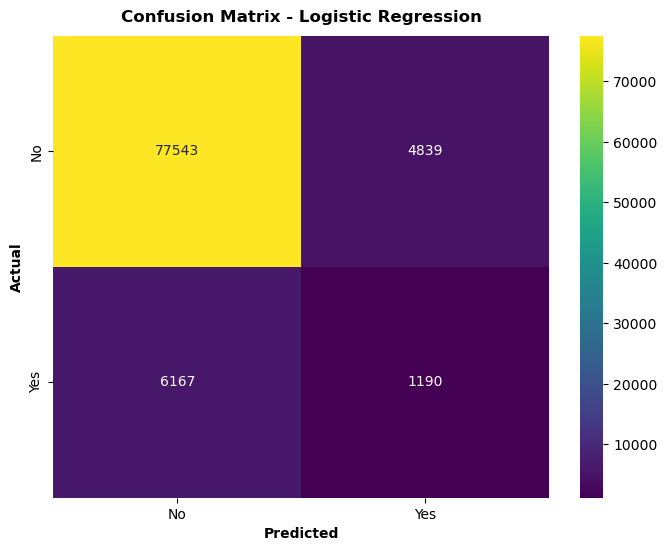

In [107]:
# Import library
from sklearn.metrics import confusion_matrix

# Model predictions
y_pred = lr_tuned.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "viridis", xticklabels= ['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression', pad = 10, fontweight = 'bold', fontsize = 12)
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

By using the results of *hyperparameter tuning* for the Logistic Regression model, we train the model again to get a **confusion matrix** as shown above, with the following results:

- **True Positive**: Predicted the loan was approved and it turned out to be correct 1,190 times.
- **True Negative**: Predicted the loan was not approved and it turned out to be correct 77,543 times.
- **False Positive**: Predicted the loan was approved and turned out to be wrong by 4,839 times.
- **False Negative**: Predicted the loan was not approved and turned out to be wrong 6,167 times.

## 4. Business Recommendation
- The **top 3 features** to predict the default clients are **NAME_FAMILY_STATUS**, **NAME_HOUSING_TYPE** and **NAME_TYPE_SUITE**.
- Focus on clients aged **40 years** and over, **widow** or **separated**, who live in **apartments**, are **accompanied by another person** when applying for the loan and have **high education** or an **academic degree** because most of them **do not have problems** when repaying the loan.
- Be careful with clients who are young or **under 40 years** old, **single** or **married**, still live with their **parents**, are **unaccompanied** when applying for the loan, and have **low education** because most of them **have problems** when repaying the loan.